In [13]:
library(tidyverse)
library(dplyr)
library(stringr)
library(microViz)
library(metagMisc)
library(phyloseq)
library(phylosignal)
library(ggplot2)
library(ggsci)
library(viridis)
library(vegan)
library(ape)

Loading required package: permute

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:phylosignal’:

    dotplot


This is vegan 2.6-4



# Sample files of datasets

In [2]:
tmp.amato=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/samples_amato.txt",col_names=T)
tmp.mgnify=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/samples_mgnify.txt",col_names=T)
tmp.muehl=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/samples_muehl.txt",col_names=T)
tmp.plants=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/samples_plants.txt",col_names=T)

Rows: 95 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Sample, Read1
lgl (1): Notes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 313 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Sample, Read1, Read2
lgl (2): Paired, Notes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 19 Columns: 4
── Column spe

In [3]:
tmp.amato
tmp.mgnify
tmp.muehl
tmp.plants

Sample,Read1,Notes
<chr>,<chr>,<lgl>
AC622,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/AC622/R1_final.fq.gz,NA
AC660,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/AC660/R1_final.fq.gz,NA
AC665,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/AC665/R1_final.fq.gz,NA
AC667,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/AC667/R1_final.fq.gz,NA
AC668,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/AC668/R1_final.fq.gz,NA
APAL36,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/APAL36/R1_final.fq.gz,NA
APAL37,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/APAL37/R1_final.fq.gz,NA
APAL38,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/APAL38/R1_final.fq.gz,NA
APAL39,/ebio/abt3_projects/databases_no-backup/Amato_metagenomes/Seqs/final/APAL39/R1_final.fq.gz,NA


Sample,Read1,Read2
<chr>,<chr>,<chr>
ERR2114804,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114804_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114804_1-trimmed-pair2.fastq.gz
ERR2114805,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114805_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114805_1-trimmed-pair2.fastq.gz
ERR2114806,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114806_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114806_1-trimmed-pair2.fastq.gz
ERR2114807,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114807_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114807_1-trimmed-pair2.fastq.gz
ERR2114808,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114808_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114808_1-trimmed-pair2.fastq.gz
ERR2114809,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114809_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114809_1-trimmed-pair2.fastq.gz
ERR2114810,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114810_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114810_1-trimmed-pair2.fastq.gz
ERR2114811,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114811_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114811_1-trimmed-pair2.fastq.gz
ERR2114812,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114812_1-trimmed-pair1.fastq.gz,/ebio/abt3_scratch/aborbon/plantMetagenomes/manual_qc/2_skewer/ERR2114812_1-trimmed-pair2.fastq.gz


# Import metadata file

In [4]:
mappingAll=read_tsv("/tmp/global2/aborbon/metadataAllSamples.tsv",col_names=T)

Rows: 852 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): Sample, Dataset, biome_0, biome_1, biome_2, biome_3, biome_4, family

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample,Dataset,biome_0,biome_1,biome_2,biome_3,biome_4,family
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERS233527,MGYS00000320,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS233526,MGYS00000320,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS233524,MGYS00000320,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS233525,MGYS00000320,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS612894,MGYS00000447,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS612888,MGYS00000447,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS612896,MGYS00000447,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS612885,MGYS00000447,root,Environmental,Aquatic,Marine,Intertidal zone,NA
ERS612891,MGYS00000447,root,Environmental,Aquatic,Marine,Intertidal zone,NA


# Create one samples.txt file for all samples

In [5]:
allsamples=bind_rows(tmp.muehl,tmp.mgnify,tmp.plants)#%>%
  select(Sample,Read1,Read2)
write_tsv(allsamples,"/ebio/abt3_scratch/aborbon/taxonomy_profiles/allsamples.txt")

ERROR: Error in select(Sample, Read1, Read2): object 'Sample' not found


# Kraken vertebrates

In [6]:
kraken_vertebrates=read_tsv("/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns-n11/LLMGP/kraken/all-combined-bracken.tsv",col_names=T)

kraken_vertebrates_frac=select(kraken_vertebrates,name,taxonomy_id,taxonomy,ends_with("frac"))
colnames(kraken_vertebrates_frac)=gsub("_frac","",colnames(kraken_vertebrates_frac))

Rows: 30988 Columns: 581
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (4): name, taxonomy_lvl, taxonomy, taxIDs
dbl (577): taxonomy_id, X74_Steppe_Polecat_num, X74_Steppe_Polecat_frac, X76...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,taxonomy_id,taxonomy_lvl,taxonomy,taxIDs,X74_Steppe_Polecat_num,X74_Steppe_Polecat_frac,X76_European_Polecat_num,X76_European_Polecat_frac,X30_Beech_Marten_num,⋯,X276_Barnacle_Goose_num,X276_Barnacle_Goose_frac,X355_Hoffmanns_Two_toed_Sloth_num,X355_Hoffmanns_Two_toed_Sloth_frac,X199_Human_num,X199_Human_frac,X256_Zander_num,X256_Zander_frac,X84_Common_Chiffchaff_num,X84_Common_Chiffchaff_frac
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s__Lachnoclostridium sp003526525,195340,S,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium;s__Lachnoclostridium sp003526525,5839;73842;73843;129916;129917;177448;195340,0,0,13,0.00018,15,⋯,433,1e-05,35,0e+00,280,1e-05,463,0.00007,22,0e+00
s__TM7x sp900556885,222438,S,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__TM7x;s__TM7x sp900556885,5839;140636;156026;156027;156028;179862;222438,0,0,0,0.00000,0,⋯,0,0e+00,0,0e+00,39,0e+00,0,0.00000,0,0e+00
s__SLQR01 sp007131405,215677,S,d__Bacteria;p__Firmicutes;c__Bacilli;o__Izemoplasmatales;f__Izemoplasmataceae;g__SLQR01;s__SLQR01 sp007131405,5839;28625;28626;161856;161857;161858;215677,0,0,0,0.00000,0,⋯,17,0e+00,0,0e+00,0,0e+00,0,0.00000,0,0e+00
s__CSBR16-87 sp007123535,198185,S,d__Bacteria;p__Firmicutes;c__Bacilli;o__Izemoplasmatales;f__Izemoplasmataceae;g__CSBR16-87;s__CSBR16-87 sp007123535,5839;28625;28626;161856;161857;198184;198185,0,0,0,0.00000,0,⋯,0,0e+00,0,0e+00,0,0e+00,0,0.00000,0,0e+00
s__Eubacterium_F sp002431395,219320,S,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eubacterium_F;s__Eubacterium_F sp002431395,5839;73842;73843;129916;129917;150368;219320,0,0,0,0.00000,0,⋯,41,0e+00,60,0e+00,801,2e-05,0,0.00000,0,0e+00
s__UBA11517 sp900551855,218566,S,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__UBA1242;g__UBA11517;s__UBA11517 sp900551855,5839;73842;148014;148015;185788;185789;218566,0,0,0,0.00000,0,⋯,49,0e+00,0,0e+00,21,0e+00,52,0.00001,0,0e+00
s__T1SED10-28 sp003554105,160038,S,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__T1SED10-28;g__T1SED10-28;s__T1SED10-28 sp003554105,5839;73842;73843;73844;160036;160037;160038,0,0,0,0.00000,0,⋯,29,0e+00,0,0e+00,51,0e+00,109,0.00002,0,0e+00
s__Granulicatella sp900551535,205233,S,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Granulicatella;s__Granulicatella sp900551535,5839;28625;28626;39128;145377;162853;205233,0,0,0,0.00000,0,⋯,46,0e+00,0,0e+00,39,0e+00,19,0.00000,1195,1e-04
s__Gp7-AA6 sp003222385,188074,S,d__Bacteria;p__Acidobacteriota;c__Thermoanaerobaculia;o__UBA5066;f__Gp7-AA6;g__Gp7-AA6;s__Gp7-AA6 sp003222385,5839;138250;161966;188071;188072;188073;188074,0,0,0,0.00000,0,⋯,0,0e+00,0,0e+00,12,0e+00,0,0.00000,0,0e+00


name,taxonomy_id,taxonomy,X74_Steppe_Polecat,X76_European_Polecat,X30_Beech_Marten,X8_Garden_Dormouse,X79_Eurasian_Beaver,X144_Cattle,X435_Bactrian_Camel,⋯,X18_West_European_Hedgehog,X299_fail_Chestnut_rumped_Thornbill,X243_Noctule,X157_Grey_Heron,X347_Brown_Bear,X276_Barnacle_Goose,X355_Hoffmanns_Two_toed_Sloth,X199_Human,X256_Zander,X84_Common_Chiffchaff
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s__Lachnoclostridium sp003526525,195340,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium;s__Lachnoclostridium sp003526525,0,0.00018,9e-05,0.00000,0.00000,0.00010,0.00009,⋯,0e+00,0,0,0.00003,6e-05,1e-05,0e+00,1e-05,0.00007,0e+00
s__TM7x sp900556885,222438,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__TM7x;s__TM7x sp900556885,0,0.00000,0e+00,0.00000,0.00000,0.00000,0.00000,⋯,0e+00,0,0,0.00000,0e+00,0e+00,0e+00,0e+00,0.00000,0e+00
s__SLQR01 sp007131405,215677,d__Bacteria;p__Firmicutes;c__Bacilli;o__Izemoplasmatales;f__Izemoplasmataceae;g__SLQR01;s__SLQR01 sp007131405,0,0.00000,0e+00,0.00000,0.00000,0.00001,0.00000,⋯,0e+00,0,0,0.00000,0e+00,0e+00,0e+00,0e+00,0.00000,0e+00
s__CSBR16-87 sp007123535,198185,d__Bacteria;p__Firmicutes;c__Bacilli;o__Izemoplasmatales;f__Izemoplasmataceae;g__CSBR16-87;s__CSBR16-87 sp007123535,0,0.00000,0e+00,0.00000,0.00000,0.00000,0.00000,⋯,0e+00,0,0,0.00000,0e+00,0e+00,0e+00,0e+00,0.00000,0e+00
s__Eubacterium_F sp002431395,219320,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eubacterium_F;s__Eubacterium_F sp002431395,0,0.00000,0e+00,0.00000,0.00000,0.00005,0.00005,⋯,0e+00,0,0,0.00001,0e+00,0e+00,0e+00,2e-05,0.00000,0e+00
s__UBA11517 sp900551855,218566,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__UBA1242;g__UBA11517;s__UBA11517 sp900551855,0,0.00000,0e+00,0.00000,0.00000,0.00005,0.00005,⋯,0e+00,0,0,0.00000,0e+00,0e+00,0e+00,0e+00,0.00001,0e+00
s__T1SED10-28 sp003554105,160038,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__T1SED10-28;g__T1SED10-28;s__T1SED10-28 sp003554105,0,0.00000,0e+00,0.00000,0.00000,0.00002,0.00001,⋯,0e+00,0,0,0.00000,0e+00,0e+00,0e+00,0e+00,0.00002,0e+00
s__Granulicatella sp900551535,205233,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Granulicatella;s__Granulicatella sp900551535,0,0.00000,0e+00,0.00000,0.00000,0.00001,0.00000,⋯,0e+00,0,0,0.00000,0e+00,0e+00,0e+00,0e+00,0.00000,1e-04
s__Gp7-AA6 sp003222385,188074,d__Bacteria;p__Acidobacteriota;c__Thermoanaerobaculia;o__UBA5066;f__Gp7-AA6;g__Gp7-AA6;s__Gp7-AA6 sp003222385,0,0.00000,0e+00,0.00000,0.00000,0.00001,0.00001,⋯,0e+00,0,0,0.00000,2e-05,0e+00,0e+00,0e+00,0.00000,0e+00


In [36]:
kraken_vertebrates_num=select(kraken_vertebrates,name,taxonomy_id,taxonomy,ends_with("num"))
colnames(kraken_vertebrates_num)=gsub("_num","",colnames(kraken_vertebrates_num))

# Create phyloseq object for kraken results of vertebrate samples

In [37]:
#otu counts
kraken_vertebrates_otus=kraken_vertebrates_num %>%
  select(-c(taxonomy_id,taxonomy))

otus_kraken.vert=otu_table(kraken_vertebrates_otus[,2:ncol(kraken_vertebrates_otus)],taxa_are_rows = TRUE)
rownames(otus_kraken.vert)=kraken_vertebrates_otus$name

#taxonomy table
tax.kraken=kraken_vertebrates %>%
  select(name,taxonomy)

tax.kraken.vert=tax_table(as.matrix(tax.kraken[,2:ncol(tax.kraken)]))
rownames(tax.kraken.vert)=tax.kraken$name


#metadata
mapping_ps_vert=sample_data(filter(mappingAll,Dataset=="Vertebrata"))
rownames(mapping_ps_vert)=(filter(mappingAll,Dataset=="Vertebrata"))$Sample

#Phyloseq kraken vertebrates
ps.kraken.vert=phyloseq(otus_kraken.vert,tax.kraken.vert,mapping_ps_vert)


# Filter OTUs

In [40]:

#Filter based on prevalence
filter_taxa_All.vert = phyloseq_filter_prevalence(ps.kraken.vert, prev.trh = 0.05, abund.trh = NULL,
  threshold_condition = "OR", abund.type = "total") #943 taxa and 809 samples

#Prune samples without any identified flagellin
filter_taxa_All2.vert=prune_samples(sample_sums(filter_taxa_All.vert)>0,filter_taxa_All.vert)
filter_taxa_All2.vert

#Normalize relative abundances
filt.ps.relab.normAll.vert  = transform_sample_counts(filter_taxa_All.vert, function(x) (x / sum(x)) ) 
filt.ps.relab.normAll.vert

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30460 taxa and 276 samples ]
sample_data() Sample Data:       [ 276 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 30460 taxa by 1 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30460 taxa and 276 samples ]
sample_data() Sample Data:       [ 276 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 30460 taxa by 1 taxonomic ranks ]

In [51]:
options(repr.plot.width=15,repr.plot.height=8)
vert.rich=plot_richness(ps.kraken.vert,x="biome_2",measures=c("Shannon","Observed","Chao1"),color="biome_2",sortby="Observed")+
geom_boxplot()+
scale_color_npg()#+
#theme(axis.text.x=element_text(size=15,angle=45),
 #    axis.text.y=element_text(size=15))



Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


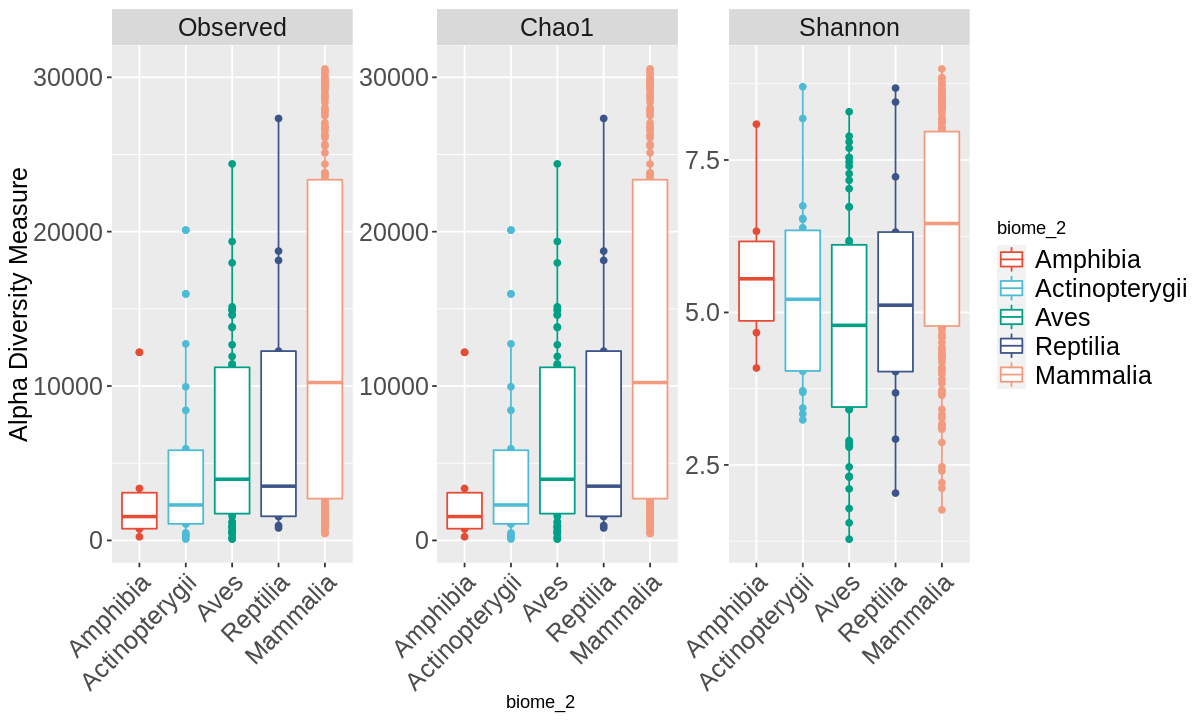

In [65]:
options(repr.plot.width=10,repr.plot.height=6)
vert.rich + 
theme(axis.text.x=element_text(size=15,angle=45,vjust=1,hjust=1),
     axis.text.y=element_text(size=15),
     axis.title.y=element_text(size=15),
     legend.text=element_text(size=15),
     strip.text=element_text(size=15))

# Group dissimilarity - vertebrates

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.



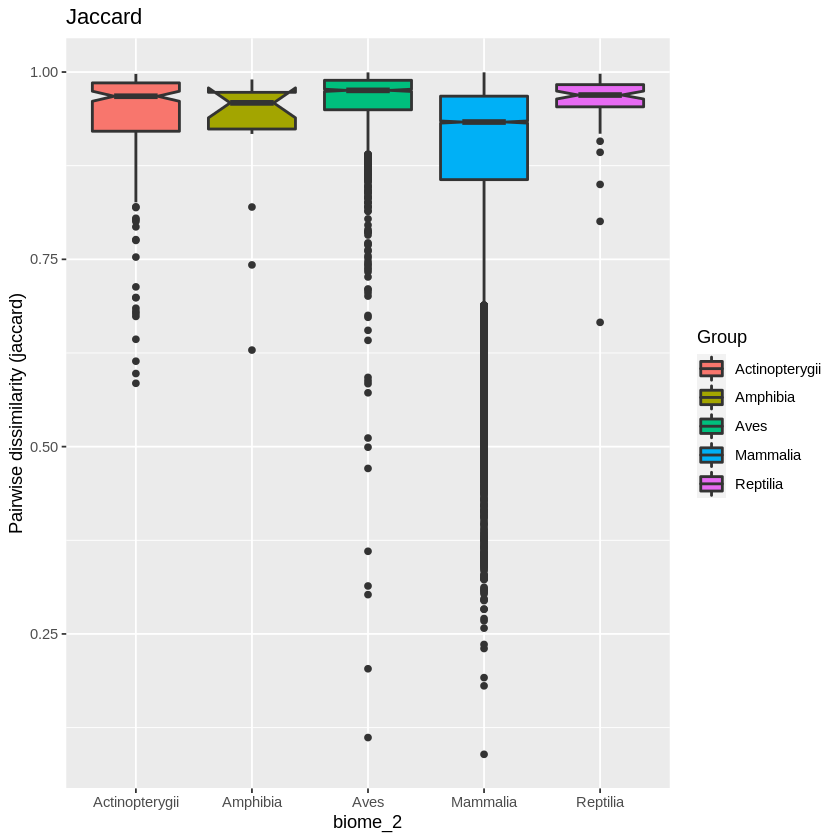

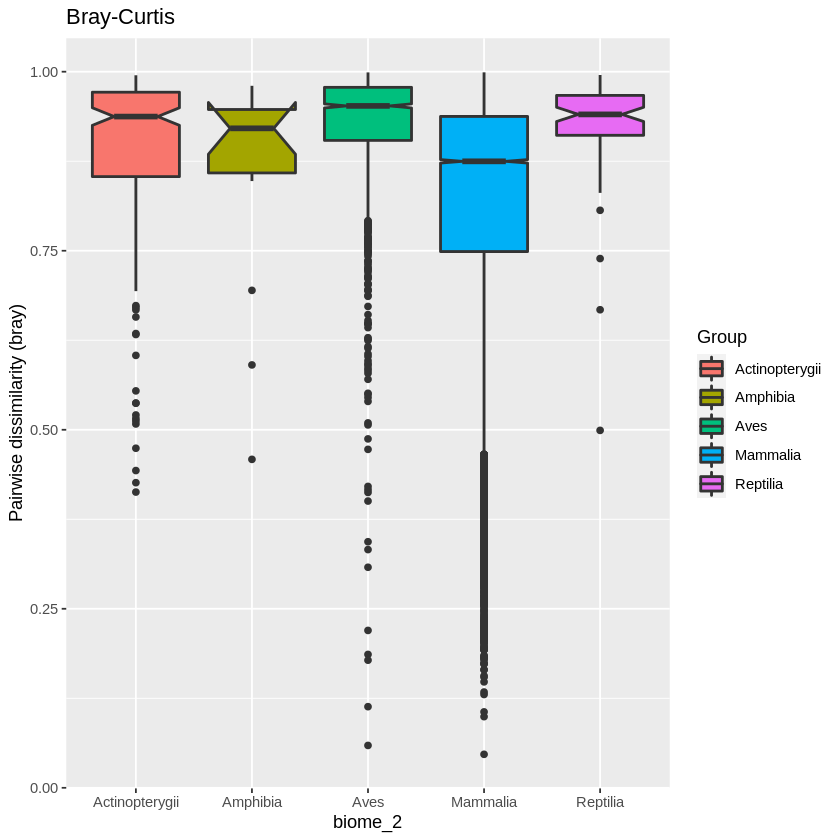

In [9]:
diss.jacc.vert=phyloseq_group_dissimilarity(filt.ps.relab.normAll.vert,group="biome_2",method="jaccard",between_groups = FALSE)+ggtitle("Jaccard")
diss.bray.vert=phyloseq_group_dissimilarity(filt.ps.relab.normAll.vert,group="biome_2",method="bray",between_groups = FALSE)+ggtitle("Bray-Curtis")
#diss.unifrac1=phyloseq_group_dissimilarity(filt.ps.relab.normAll.vert,group="biome_1",method="unifrac",between_groups = FALSE)+ggtitle("uUniFrac")
#diss.wunifrac1=phyloseq_group_dissimilarity(filt.ps.relab.normAll.vert,group="biome_1",method="wunifrac",between_groups = FALSE)+ggtitle("wUniFrac")


diss.jacc.vert
diss.bray.vert

#Ordination plots with non-phylogenetic metrics

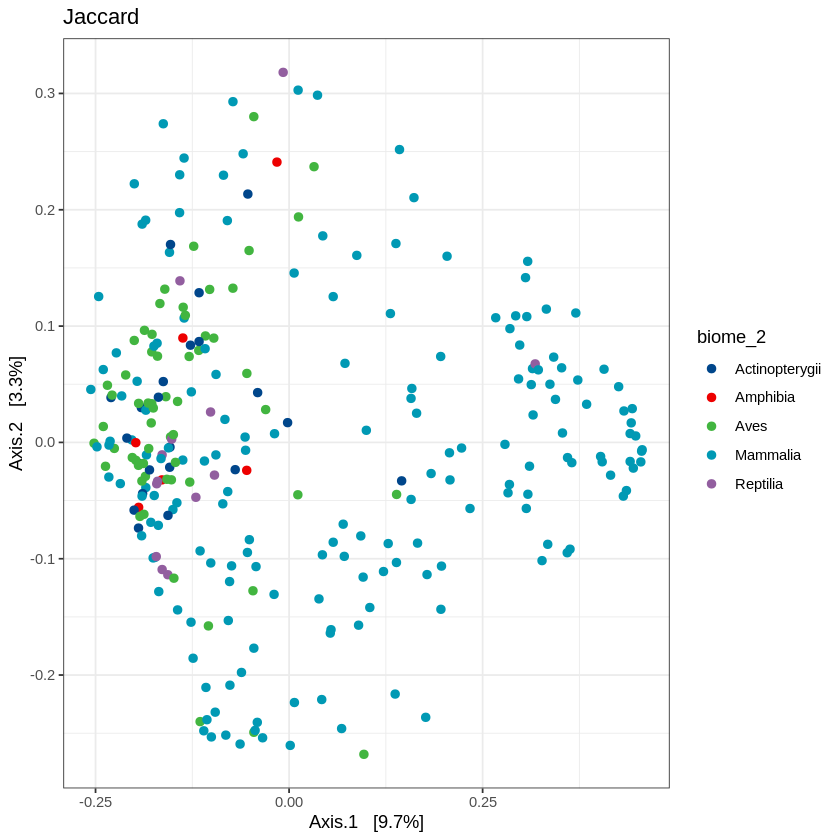

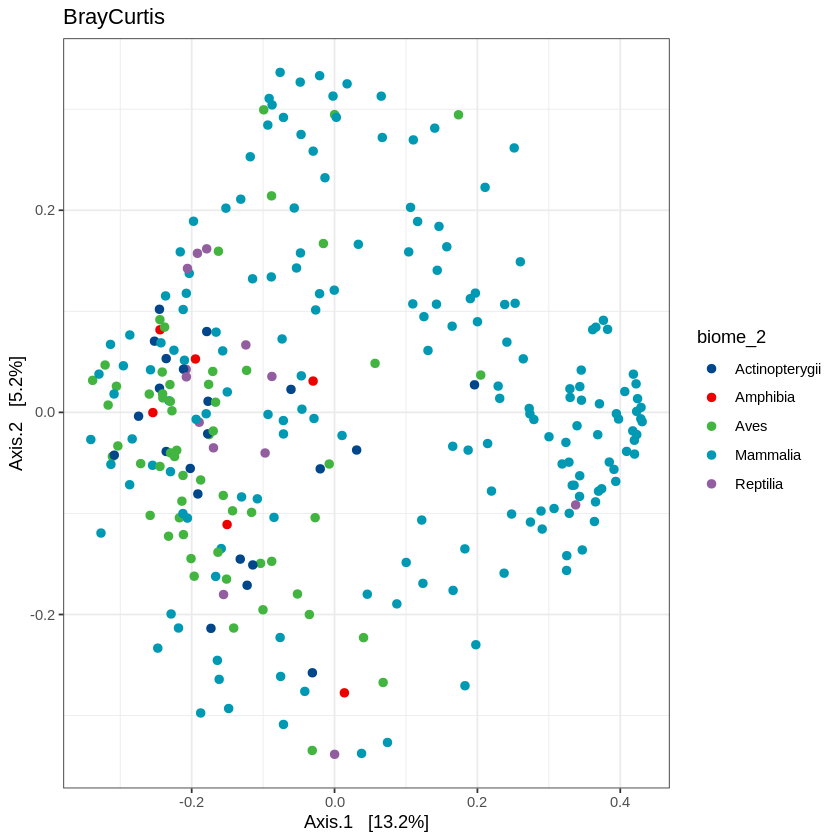

In [10]:
plot_ordination(physeq = filt.ps.relab.normAll.vert,ordinate(filt.ps.relab.normAll.vert,distance="jaccard",method="PCoA"),type="samples",color="biome_2")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("Jaccard")

plot_ordination(physeq = filt.ps.relab.normAll.vert,ordinate(filt.ps.relab.normAll.vert,distance="bray",method="PCoA"),type="samples",color="biome_2")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("BrayCurtis")


#Mantel test to test correlation between flagellome and microbiome composition
This chunks runs a correlation test between the distance matrix obtained from the flagellin composition and the distance matrix obtained with kraken for the taxonomic composition of the same metagenomic samples

In [14]:
tmp.sam.vert=filt.ps.relab.normAll.vert@sam_data
ps.filt.ab.vert=phyloseq(filt.ps.relab.normAll.vert@otu_table,filt.ps.relab.normAll.vert@tax_table,tmp.sam.vert)

ps_vertebrates.fla=ps_filter(filt.ps.relab.normAll.vert, Dataset == "Vertebrata" )
ps.vert.fla=phyloseq(ps_vertebrates.fla@otu_table,ps_vertebrates.fla@tax_table,tmp.sam.vert)

#Distance matrices
bray.vert.fla=distance(ps.vert.fla,method="bray")
bray.vert.ubiom=distance(ps.filt.ab.vert,method="bray")

mantel.vert=mantel(bray.vert.fla,bray.vert.ubiom,method="spearman")
mantel.vert



Mantel statistic based on Spearman's rank correlation rho 

Call:
mantel(xdis = bray.vert.fla, ydis = bray.vert.ubiom, method = "spearman") 

Mantel statistic r:     1 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0485 0.0591 0.0725 0.0891 
Permutation: free
Number of permutations: 999


#Plot richness with the absolute count files

### LLMGP

##### MGnify dataset
##### Alpha diversity analyes from qiime2

In [15]:
adiv.mg00=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/mgnify/llmgp/output_mgnify00/kraken/all-combined-bracken.tsv",col_names=T)

adiv.mg01=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/mgnify/llmgp/output_mgnify01/kraken/all-combined-bracken.tsv",col_names=T)

#adiv.mg02=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/mgnify/llmgp/output_mgnify02/kraken/",col_names=T)

Rows: 4246 Columns: 213
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (4): name, taxonomy_lvl, taxonomy, taxIDs
dbl (209): taxonomy_id, ERS723591_num, ERS723591_frac, ERS723612_num, ERS723...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,taxonomy_id,taxonomy_lvl,taxonomy,taxIDs,ERS723591_num,ERS723591_frac,ERS723612_num,ERS723612_frac,ERS723614_num,⋯,ERS1030534_num,ERS1030534_frac,ERS1030533_num,ERS1030533_frac,ERS1030531_num,ERS1030531_frac,ERS1030539_num,ERS1030539_frac,ERS1030536_num,ERS1030536_frac
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pandoraea faecigallinarum,656179,S,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiaceae;Pandoraea;Pandoraea faecigallinarum,131567;2;1224;28216;80840;119060;93217;656179,0,0.00000,0,0.00000,0,⋯,18,0.00018,35,0.00035,0,0.00000,18,0.00018,17,0.00015
Helicobacter cholecystus,45498,S,Bacteria;Proteobacteria;Epsilonproteobacteria;Campylobacterales;Helicobacteraceae;Helicobacter;Helicobacter cholecystus,131567;2;1224;68525;29547;213849;72293;209;45498,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Pseudomonas palleroniana,191390,S,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;Pseudomonas palleroniana,131567;2;1224;1236;72274;135621;286;191390,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Pseudarthrobacter sp. NBSH8,2596911,S,Bacteria;Actinobacteria;Actinobacteria;Micrococcales;Micrococcaceae;Pseudarthrobacter;Pseudarthrobacter sp. NBSH8,131567;2;1783272;201174;1760;85006;1268;1742993;2647000;2596911,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Synechococcus sp. Minos11,221341,S,Bacteria;Cyanobacteria;;Synechococcales;Synechococcaceae;Synechococcus;Synechococcus sp. Minos11,131567;2;1783272;1798711;1117;1890424;1890426;1129;2626047;221341,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Fibrella aestuarina,651143,S,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Fibrella;Fibrella aestuarina,131567;2;1783270;68336;976;768503;768507;89373;861914;651143,0,0.00000,0,0.00000,0,⋯,47,0.00046,0,0.00000,0,0.00000,43,0.00042,154,0.00132
Streptococcus lutetiensis,150055,S,Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;Streptococcus lutetiensis,131567;2;1783272;1239;91061;186826;1300;1301;150055,84,0.00027,124,0.00044,250,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Paracoccus sanguinis,1545044,S,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Paracoccus;Paracoccus sanguinis,131567;2;1224;28211;204455;31989;265;1545044,0,0.00000,0,0.00000,0,⋯,24,0.00023,14,0.00014,19,0.00020,22,0.00022,15,0.00013
Paenibacillus sp. CAA11,1532905,S,Bacteria;Firmicutes;Bacilli;Bacillales;Paenibacillaceae;Paenibacillus;Paenibacillus sp. CAA11,131567;2;1783272;1239;91061;1385;186822;44249;185978;1532905,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


Rows: 4519 Columns: 215
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (4): name, taxonomy_lvl, taxonomy, taxIDs
dbl (211): taxonomy_id, ERS1030535_num, ERS1030535_frac, ERS1030538_num, ERS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,taxonomy_id,taxonomy_lvl,taxonomy,taxIDs,ERS1030535_num,ERS1030535_frac,ERS1030538_num,ERS1030538_frac,ERS1222675_num,⋯,ERS1459890_num,ERS1459890_frac,ERS1546719_num,ERS1546719_frac,ERS1546720_num,ERS1546720_frac,ERS1115236_num,ERS1115236_frac,ERS1115237_num,ERS1115237_frac
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pandoraea faecigallinarum,656179,S,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiaceae;Pandoraea;Pandoraea faecigallinarum,131567;2;1224;28216;80840;119060;93217;656179,17,0.00017,15,0.00014,0,⋯,0,0.00000,0,0.00000,24,0.00025,19,0.00022,23,0.00029
Planctomycetes bacterium K23_9,1930275,S,Bacteria;Planctomycetes;;;;;Planctomycetes bacterium K23_9,131567;2;1783257;203682;473814;1930275,0,0.00000,0,0.00000,0,⋯,0,0.00000,22,0.00051,0,0.00000,0,0.00000,0,0.00000
Pseudomonas palleroniana,191390,S,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;Pseudomonas palleroniana,131567;2;1224;1236;72274;135621;286;191390,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Maribacter sp. 1_2014MBL_MicDiv,1644130,S,Bacteria;Bacteroidetes;Flavobacteriia;Flavobacteriales;Flavobacteriaceae;Maribacter;Maribacter sp. 1_2014MBL_MicDiv,131567;2;1783270;68336;976;117743;200644;49546;252356;2615042;1644130,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Pseudarthrobacter sp. NBSH8,2596911,S,Bacteria;Actinobacteria;Actinobacteria;Micrococcales;Micrococcaceae;Pseudarthrobacter;Pseudarthrobacter sp. NBSH8,131567;2;1783272;201174;1760;85006;1268;1742993;2647000;2596911,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Synechococcus sp. Minos11,221341,S,Bacteria;Cyanobacteria;;Synechococcales;Synechococcaceae;Synechococcus;Synechococcus sp. Minos11,131567;2;1783272;1798711;1117;1890424;1890426;1129;2626047;221341,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Fibrella aestuarina,651143,S,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Fibrella;Fibrella aestuarina,131567;2;1783270;68336;976;768503;768507;89373;861914;651143,23,0.00023,63,0.00059,0,⋯,0,0.00000,21,0.00049,25,0.00026,24,0.00028,0,0.00000
Paracoccus sanguinis,1545044,S,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Paracoccus;Paracoccus sanguinis,131567;2;1224;28211;204455;31989;265;1545044,21,0.00021,14,0.00013,0,⋯,13,0.00009,34,0.00079,91,0.00093,27,0.00032,27,0.00035
Moraxella bovoculi,386891,S,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Moraxella;Moraxella bovoculi,131567;2;1224;1236;72274;468;475;386891,0,0.00000,0,0.00000,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


#### Kraken results - Mgnify

In [16]:
kraken.mg00=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/mgnify/llmgp/output_mgnify00/kraken/all-combined-bracken.tsv",col_names=T)
kraken.mg01=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/mgnify/llmgp/output_mgnify01/kraken/all-combined-bracken.tsv",col_names=T)
#kraken.mg02=read_tsv("/ebio/abt3_scratch/aborbon/taxonomy_profiles/mgnify/llmgp/output_mgnify02/kraken/all-combined_kraken-unclassified.tsv",col_names=T)       

kraken.mgnify=inner_join(kraken.mg00,kraken.mg01,by="name")


Rows: 4246 Columns: 213
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (4): name, taxonomy_lvl, taxonomy, taxIDs
dbl (209): taxonomy_id, ERS723591_num, ERS723591_frac, ERS723612_num, ERS723...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4519 Columns: 215
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (4): name, taxonomy_lvl, taxonomy, taxIDs
dbl (211): taxonomy_id, ERS1030535_num, ERS1030535_frac, ERS1030538_num, ERS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,taxonomy_id.x,taxonomy_lvl.x,taxonomy.x,taxIDs.x,ERS723591_num,ERS723591_frac,ERS723612_num,ERS723612_frac,ERS723614_num,⋯,ERS1459890_num,ERS1459890_frac,ERS1546719_num,ERS1546719_frac,ERS1546720_num,ERS1546720_frac,ERS1115236_num,ERS1115236_frac,ERS1115237_num,ERS1115237_frac
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pandoraea faecigallinarum,656179,S,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiaceae;Pandoraea;Pandoraea faecigallinarum,131567;2;1224;28216;80840;119060;93217;656179,0,0,0,0,0,⋯,0,0.00000,0,0.00000,24,0.00025,19,0.00022,23,0.00029
Helicobacter cholecystus,45498,S,Bacteria;Proteobacteria;Epsilonproteobacteria;Campylobacterales;Helicobacteraceae;Helicobacter;Helicobacter cholecystus,131567;2;1224;68525;29547;213849;72293;209;45498,0,0,0,0,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Pseudomonas palleroniana,191390,S,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;Pseudomonas palleroniana,131567;2;1224;1236;72274;135621;286;191390,0,0,0,0,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Pseudarthrobacter sp. NBSH8,2596911,S,Bacteria;Actinobacteria;Actinobacteria;Micrococcales;Micrococcaceae;Pseudarthrobacter;Pseudarthrobacter sp. NBSH8,131567;2;1783272;201174;1760;85006;1268;1742993;2647000;2596911,0,0,0,0,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Synechococcus sp. Minos11,221341,S,Bacteria;Cyanobacteria;;Synechococcales;Synechococcaceae;Synechococcus;Synechococcus sp. Minos11,131567;2;1783272;1798711;1117;1890424;1890426;1129;2626047;221341,0,0,0,0,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Fibrella aestuarina,651143,S,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Fibrella;Fibrella aestuarina,131567;2;1783270;68336;976;768503;768507;89373;861914;651143,0,0,0,0,0,⋯,0,0.00000,21,0.00049,25,0.00026,24,0.00028,0,0.00000
Paracoccus sanguinis,1545044,S,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Paracoccus;Paracoccus sanguinis,131567;2;1224;28211;204455;31989;265;1545044,0,0,0,0,0,⋯,13,0.00009,34,0.00079,91,0.00093,27,0.00032,27,0.00035
Paenibacillus sp. CAA11,1532905,S,Bacteria;Firmicutes;Bacilli;Bacillales;Paenibacillaceae;Paenibacillus;Paenibacillus sp. CAA11,131567;2;1783272;1239;91061;1385;186822;44249;185978;1532905,0,0,0,0,0,⋯,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Rhodomicrobium vannielii,1069,S,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Hyphomicrobiaceae;Rhodomicrobium;Rhodomicrobium vannielii,131567;2;1224;28211;356;45401;1068;1069,0,0,0,0,0,⋯,0,0.00000,42,0.00097,67,0.00069,39,0.00046,33,0.00042


#Kraken - Mgnify

In [17]:
kraken.mgnify.frac=select(kraken.mgnify,name,taxonomy_id.x,taxonomy.x,ends_with("frac"))
colnames(kraken.mgnify.frac)=gsub("_frac","",colnames(kraken.mgnify.frac))
kraken.mgnify.frac = kraken.mgnify.frac%>%
  dplyr::rename(taxonomy="taxonomy.x")%>%
  dplyr::rename(taxonomy_id="taxonomy_id.x")


name,taxonomy_id,taxonomy,ERS723591,ERS723612,ERS723614,ERS723595,ERS723671,ERS723593,ERS723663,⋯,ERS1459886,ERS1455390,ERS1455389,ERS1455391,ERS1459885,ERS1459890,ERS1546719,ERS1546720,ERS1115236,ERS1115237
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pandoraea faecigallinarum,656179,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiaceae;Pandoraea;Pandoraea faecigallinarum,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00011,0.00000,0.00000,0.00025,0.00022,0.00029
Helicobacter cholecystus,45498,Bacteria;Proteobacteria;Epsilonproteobacteria;Campylobacterales;Helicobacteraceae;Helicobacter;Helicobacter cholecystus,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Pseudomonas palleroniana,191390,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;Pseudomonas palleroniana,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Pseudarthrobacter sp. NBSH8,2596911,Bacteria;Actinobacteria;Actinobacteria;Micrococcales;Micrococcaceae;Pseudarthrobacter;Pseudarthrobacter sp. NBSH8,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Synechococcus sp. Minos11,221341,Bacteria;Cyanobacteria;;Synechococcales;Synechococcaceae;Synechococcus;Synechococcus sp. Minos11,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Fibrella aestuarina,651143,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Fibrella;Fibrella aestuarina,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00049,0.00026,0.00028,0.00000
Paracoccus sanguinis,1545044,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Paracoccus;Paracoccus sanguinis,0,0,0,0e+00,0,0,0,⋯,0.00056,0.00000,0.00078,0.00000,0.00084,0.00009,0.00079,0.00093,0.00032,0.00035
Paenibacillus sp. CAA11,1532905,Bacteria;Firmicutes;Bacilli;Bacillales;Paenibacillaceae;Paenibacillus;Paenibacillus sp. CAA11,0,0,0,0e+00,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Rhodomicrobium vannielii,1069,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Hyphomicrobiaceae;Rhodomicrobium;Rhodomicrobium vannielii,0,0,0,0e+00,0,0,0,⋯,0.00012,0.00000,0.00000,0.00000,0.00000,0.00000,0.00097,0.00069,0.00046,0.00042


#mgnify phyloseq

In [18]:

#otu counts
kraken_mgnify_otus=kraken.mgnify.frac %>%
  select(-c(taxonomy_id,taxonomy))

otus_kraken.mgnify=otu_table(kraken_mgnify_otus[,2:ncol(kraken_mgnify_otus)],taxa_are_rows = TRUE)
rownames(otus_kraken.mgnify)=kraken_mgnify_otus$name
otus_kraken.mgnify

#taxonomy table
tax.kraken.mgnify=kraken.mgnify %>%
  select(name,taxonomy.x)

tax.kraken.mgnify=tax_table(as.matrix(tax.kraken.mgnify[,2:ncol(tax.kraken.mgnify)]))
rownames(tax.kraken.mgnify)=kraken.mgnify$name


#metadata
View(kraken_vertebrates)
mapping_ps_mgnify=sample_data(filter(mappingAll,Dataset!=c("Amato_2019","Vertebrata","Muehlbauer_2020")))
rownames(mapping_ps_mgnify)=(filter(mappingAll,Dataset!=c("Amato_2019","Vertebrata","Muehlbauer_2020")))$Sample

#Phyloseq kraken amato
ps.kraken.mgnify=phyloseq(otus_kraken.mgnify,tax.kraken.mgnify,mapping_ps_mgnify)
ps.kraken.mgnify


,ERS723591,ERS723612,ERS723614,ERS723595,ERS723671,ERS723593,ERS723663,ERS723676,ERS723606,ERS723624,⋯,ERS1459886,ERS1455390,ERS1455389,ERS1455391,ERS1459885,ERS1459890,ERS1546719,ERS1546720,ERS1115236,ERS1115237
Pandoraea faecigallinarum,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00011,0.00000,0.00000,0.00025,0.00022,0.00029
Helicobacter cholecystus,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Pseudomonas palleroniana,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Pseudarthrobacter sp. NBSH8,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Synechococcus sp. Minos11,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Fibrella aestuarina,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00049,0.00026,0.00028,0.00000
Paracoccus sanguinis,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00056,0.00000,0.00078,0.00000,0.00084,0.00009,0.00079,0.00093,0.00032,0.00035
Paenibacillus sp. CAA11,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Rhodomicrobium vannielii,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00012,0.00000,0.00000,0.00000,0.00000,0.00000,0.00097,0.00069,0.00046,0.00042
Xanthomonas campestris,0,0,0,0e+00,0,0,0,0,0,0,⋯,0.00041,0.00000,0.00000,0.00000,0.00024,0.00000,0.00102,0.00041,0.00051,0.00029


name,taxonomy_id,taxonomy_lvl,taxonomy,taxIDs,X74_Steppe_Polecat_num,X74_Steppe_Polecat_frac,X76_European_Polecat_num,X76_European_Polecat_frac,X30_Beech_Marten_num,⋯,X276_Barnacle_Goose_num,X276_Barnacle_Goose_frac,X355_Hoffmanns_Two_toed_Sloth_num,X355_Hoffmanns_Two_toed_Sloth_frac,X199_Human_num,X199_Human_frac,X256_Zander_num,X256_Zander_frac,X84_Common_Chiffchaff_num,X84_Common_Chiffchaff_frac
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s__Lachnoclostridium sp003526525,195340,S,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium;s__Lachnoclostridium sp003526525,5839;73842;73843;129916;129917;177448;195340,0,0,13,0.00018,15,⋯,433,1e-05,35,0e+00,280,1e-05,463,0.00007,22,0e+00
s__TM7x sp900556885,222438,S,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__TM7x;s__TM7x sp900556885,5839;140636;156026;156027;156028;179862;222438,0,0,0,0.00000,0,⋯,0,0e+00,0,0e+00,39,0e+00,0,0.00000,0,0e+00
s__SLQR01 sp007131405,215677,S,d__Bacteria;p__Firmicutes;c__Bacilli;o__Izemoplasmatales;f__Izemoplasmataceae;g__SLQR01;s__SLQR01 sp007131405,5839;28625;28626;161856;161857;161858;215677,0,0,0,0.00000,0,⋯,17,0e+00,0,0e+00,0,0e+00,0,0.00000,0,0e+00
s__CSBR16-87 sp007123535,198185,S,d__Bacteria;p__Firmicutes;c__Bacilli;o__Izemoplasmatales;f__Izemoplasmataceae;g__CSBR16-87;s__CSBR16-87 sp007123535,5839;28625;28626;161856;161857;198184;198185,0,0,0,0.00000,0,⋯,0,0e+00,0,0e+00,0,0e+00,0,0.00000,0,0e+00
s__Eubacterium_F sp002431395,219320,S,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eubacterium_F;s__Eubacterium_F sp002431395,5839;73842;73843;129916;129917;150368;219320,0,0,0,0.00000,0,⋯,41,0e+00,60,0e+00,801,2e-05,0,0.00000,0,0e+00
s__UBA11517 sp900551855,218566,S,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__UBA1242;g__UBA11517;s__UBA11517 sp900551855,5839;73842;148014;148015;185788;185789;218566,0,0,0,0.00000,0,⋯,49,0e+00,0,0e+00,21,0e+00,52,0.00001,0,0e+00
s__T1SED10-28 sp003554105,160038,S,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__T1SED10-28;g__T1SED10-28;s__T1SED10-28 sp003554105,5839;73842;73843;73844;160036;160037;160038,0,0,0,0.00000,0,⋯,29,0e+00,0,0e+00,51,0e+00,109,0.00002,0,0e+00
s__Granulicatella sp900551535,205233,S,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Granulicatella;s__Granulicatella sp900551535,5839;28625;28626;39128;145377;162853;205233,0,0,0,0.00000,0,⋯,46,0e+00,0,0e+00,39,0e+00,19,0.00000,1195,1e-04
s__Gp7-AA6 sp003222385,188074,S,d__Bacteria;p__Acidobacteriota;c__Thermoanaerobaculia;o__UBA5066;f__Gp7-AA6;g__Gp7-AA6;s__Gp7-AA6 sp003222385,5839;138250;161966;188071;188072;188073;188074,0,0,0,0.00000,0,⋯,0,0e+00,0,0e+00,12,0e+00,0,0.00000,0,0e+00


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3389 taxa and 201 samples ]
sample_data() Sample Data:       [ 201 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 3389 taxa by 1 taxonomic ranks ]

#Pre-process otu table - mgnify results

In [19]:
#Filter based on prevalence
filter_taxa_All.mgnify = phyloseq_filter_prevalence(ps.kraken.mgnify, prev.trh = 0.05, abund.trh = NULL,
  threshold_condition = "OR", abund.type = "total") #943 taxa and 809 samples

#Prune samples without any identified flagellin
filter_taxa_All2.mgnify=prune_samples(sample_sums(filter_taxa_All.mgnify)>0,filter_taxa_All.mgnify)
filter_taxa_All2.mgnify

#Normalize relative abundances
filt.ps.relab.normAll.mgnify  = transform_sample_counts(filter_taxa_All2.mgnify, function(x) (x / sum(x)) ) 
filt.ps.relab.normAll.mgnify

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2654 taxa and 201 samples ]
sample_data() Sample Data:       [ 201 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 2654 taxa by 1 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2654 taxa and 201 samples ]
sample_data() Sample Data:       [ 201 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 2654 taxa by 1 taxonomic ranks ]

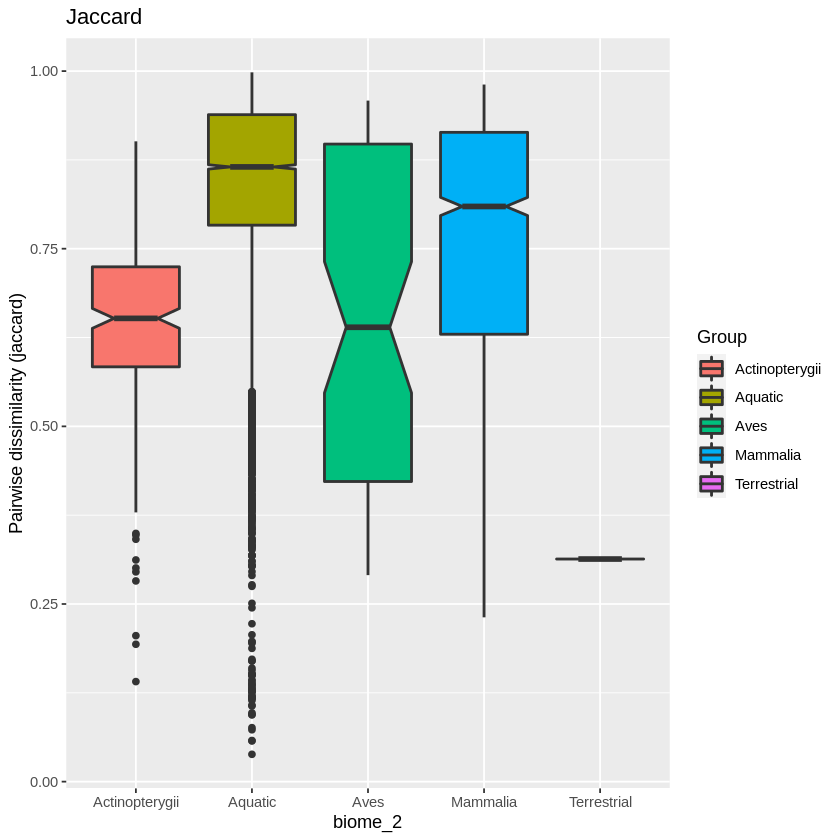

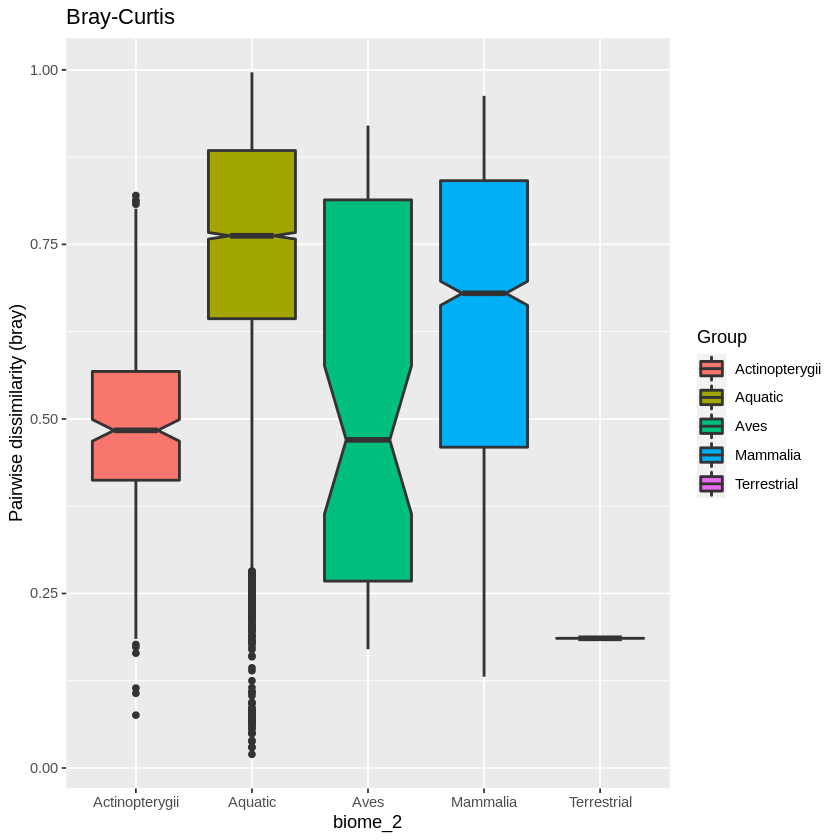

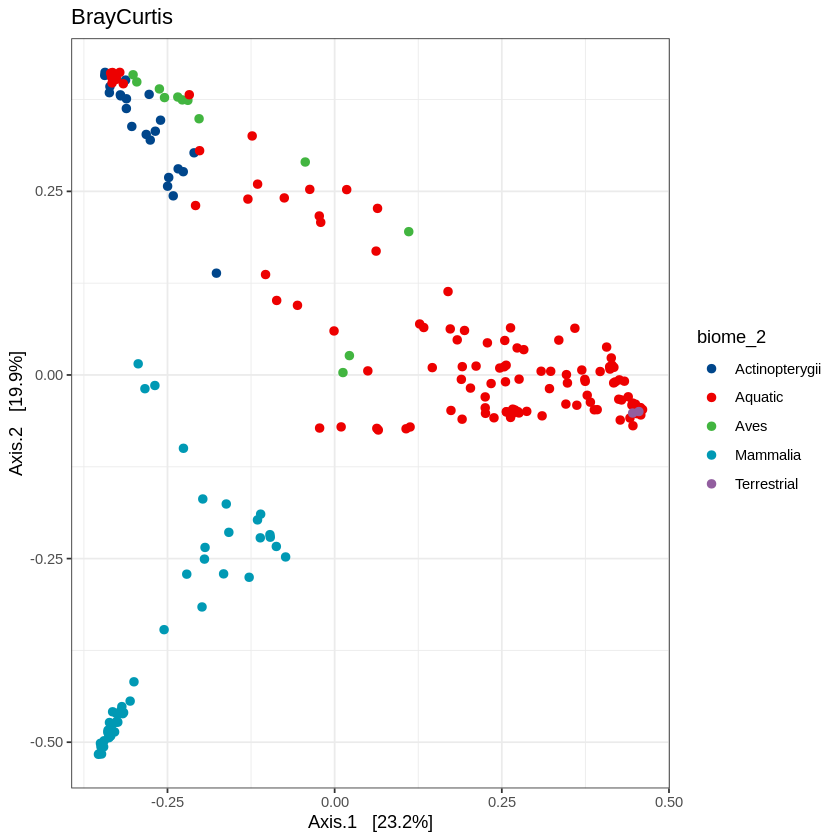

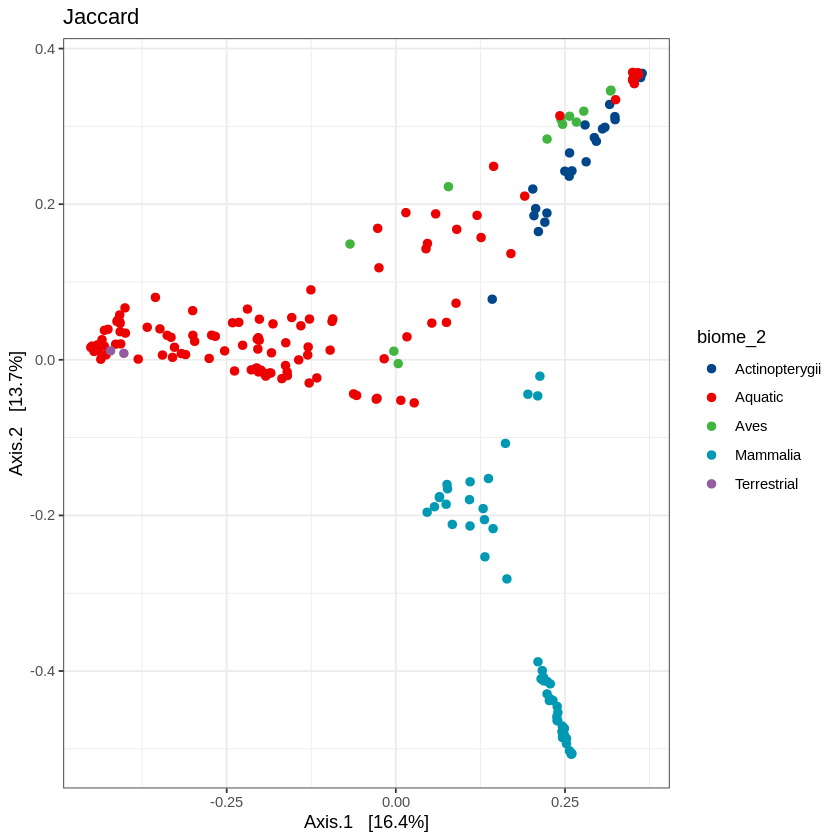

In [20]:
phyloseq_group_dissimilarity(filt.ps.relab.normAll.mgnify,group="biome_2",method="jaccard",between_groups = FALSE)+ggtitle("Jaccard")
phyloseq_group_dissimilarity(filt.ps.relab.normAll.mgnify,group="biome_2",method="bray",between_groups = FALSE)+ggtitle("Bray-Curtis")

plot_ordination(physeq = filter_taxa_All2.mgnify,ordinate(filter_taxa_All2.mgnify,distance="bray",method="PCoA"),type="samples",color="biome_2")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("BrayCurtis")

plot_ordination(physeq = filter_taxa_All2.mgnify,ordinate(filter_taxa_All2.mgnify,distance="jaccard",method="PCoA"),type="samples",color="biome_2")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("Jaccard")

#Mantel test - Mgnify dataset

In [21]:
ps_fla.amato=ps_filter(filt.ps.relab.normAll, Dataset == "Amato_2019")

ps_fla.mgnify=ps_filter(filt.ps.relab.normAll, Dataset != "Amato_2019") %>%
  ps_filter(Dataset!="Vertebrata") %>%
  ps_filter(Dataset!="Muehlbauer_2020")
  
ps_fla.mgnify

ERROR: Error in ps_filter(filt.ps.relab.normAll, Dataset == "Amato_2019"): object 'filt.ps.relab.normAll' not found


In [ ]:
#Match samples from flagellin results amd overal microbiome results
tmp.sam.mgnify=filt.ps.relab.normAll.mgnify@sam_data #201 #kraken results
ps_fla.mgnify=phyloseq(filt.ps.normAll@otu_table,filt.ps.normAll@tax_table,tmp.sam.mgnify)

ps.mgnify.kraken=phyloseq(ps.filtab.mgnify@otu_table,ps.filtab.mgnify@tax_table,ps_fla.mgnify@sam_data)
filt.ps.normAll #flagellin results

#Distance matrices
bray.mgnify.fla=distance(ps_fla.mgnify,method="bray")
bray.mgnify.ubiom=distance(ps.mgnify.kraken,method="bray")

mantel.mgnify=mantel(bray.mgnify.fla,bray.mgnify.ubiom,method="spearman")
mantel.mgnify

filt.ps.relab.normAll.mgnify

#flagellome mgnify

In [ ]:
ps_fla.mgnify

phyloseq_group_dissimilarity(ps_fla.mgnify,group="biome_2",method="bray",between_groups = FALSE)+ggtitle("Bray-Curtis")

plot_ordination(physeq = ps_fla.mgnify,ordinate(ps_fla.mgnify,distance="bray",method="PCoA"),type="samples",color="biome_2")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("BrayCurtis")

#kraken Amato

In [ ]:
kraken.amato=read_tsv("/ebio/abt3_scratch/aborbon/llmgp/output_amato/kraken/all-combined-bracken.tsv",col_names=TRUE)
kraken.amato

kraken.amato.frac=select(kraken.amato,name,taxonomy_id,taxonomy,ends_with("frac"))
colnames(kraken.amato.frac)=gsub("_frac","",colnames(kraken.amato.frac))
kraken.amato.frac

In [ ]:
#otu counts
kraken_amato_otus=kraken.amato.frac %>%
  select(-c(taxonomy_id,taxonomy))

otus_kraken.amato=otu_table(kraken_amato_otus[,2:ncol(kraken_amato_otus)],taxa_are_rows = TRUE)
rownames(otus_kraken.amato)=kraken_amato_otus$name
otus_kraken.amato

#taxonomy table
tax.kraken.amato=kraken.amato %>%
  select(name,taxonomy)

tax.kraken.amato=tax_table(as.matrix(tax.kraken.amato[,2:ncol(tax.kraken.amato)]))
rownames(tax.kraken.amato)=kraken.amato$name


#metadata
mapping_ps_amato=sample_data(filter(mappingAll,Dataset=="Amato_2019"))
rownames(mapping_ps_amato)=(filter(mappingAll,Dataset=="Amato_2019"))$Sample

#Phyloseq kraken amato
ps.kraken.amato=phyloseq(otus_kraken.amato,tax.kraken.amato,mapping_ps_amato)
ps.kraken.amato

In [ ]:

#Filter based on prevalence
filter_taxa_All.amato = phyloseq_filter_prevalence(ps.kraken.amato, prev.trh = 0.05, abund.trh = NULL,
  threshold_condition = "OR", abund.type = "total") #943 taxa and 809 samples

#Prune samples without any identified flagellin
filter_taxa_All2.amato=prune_samples(sample_sums(filter_taxa_All.amato)>0,filter_taxa_All.amato)
filter_taxa_All2.amato

#Normalize relative abundances
filt.ps.relab.normAll.amato  = transform_sample_counts(filter_taxa_All2.amato, function(x) (x / sum(x)) ) 
filt.ps.relab.normAll.amato

In [ ]:
diss.jacc.amato=phyloseq_group_dissimilarity(filt.ps.relab.normAll.amato,group="family",method="jaccard",between_groups = FALSE)+ggtitle("Jaccard")
diss.bray.amato=phyloseq_group_dissimilarity(filt.ps.relab.normAll.amato,group="family",method="bray",between_groups = FALSE)+ggtitle("Bray-Curtis")
# diss.unifrac1=phyloseq_group_dissimilarity(filt.ps.relab.normAll.vert,group="biome_1",method="unifrac",between_groups = FALSE)+ggtitle("uUniFrac")
# diss.wunifrac1=phyloseq_group_dissimilarity(filt.ps.relab.normAll.vert,group="biome_1",method="wunifrac",between_groups = FALSE)+ggtitle("wUniFrac")

diss.jacc.amato
diss.bray.amato

#Ordination plots with non-phylogenetic metrics

In [ ]:
plot_ordination(physeq = filt.ps.relab.normAll.amato,ordinate(filt.ps.relab.normAll.amato,distance="jaccard",method="PCoA"),type="samples",color="family")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("Jaccard")

plot_ordination(physeq = filt.ps.relab.normAll.amato,ordinate(filt.ps.relab.normAll.amato,distance="bray",method="PCoA"),type="samples",color="family")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("BrayCurtis")

#Mantel test for Amato results

In [ ]:
ps_fla.amato=ps_filter(filt.ps.relab.normAll, Dataset == "Amato_2019")
ps_fla.amato

In [ ]:
#Match samples from flagellin results amd overal microbiome results
tmp.sam.amato=ps_fla.amato@sam_data
ps.filtab.amato=phyloseq(filt.ps.relab.normAll.amato@otu_table,filt.ps.relab.normAll.amato@tax_table,tmp.sam.amato)

#Distance matrices
bray.amato.fla=distance(ps_fla.amato,method="bray")
bray.amato.ubiom=distance(ps.filtab.amato,method="bray")

mantel.amato=mantel(bray.amato.fla,bray.amato.ubiom,method="spearman")
mantel.amato

#Overall microbiome compositon in Amato dataset

In [ ]:
ps.filtab.amato

plot_ordination(physeq = ps.filtab.amato,ordinate(ps.filtab.amato,distance="bray",method="PCoA"),type="samples",color="family")+
  theme_bw()+
  geom_point(size=2)+
  scale_color_lancet()+
  ggtitle("BrayCurtis")

phyloseq_group_dissimilarity(ps.filtab.amato,group="family",method="bray",between_groups = FALSE)+ggtitle("Bray-Curtis")+
  scale_fill_lancet(alpha=0.7)